# Basic Image Manipulations
* Acessing and manipulation images pixels
* Image resizing
* Cropping
* Flipping

In [1]:
# Import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/rys6f1vprily2bg/opencv_bootcamp_assets_NB2.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB2.zip")

In [4]:
# Download if assest ZIP does not exist.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

## Read image as gray scale.

In [5]:
img = cv2.imread("checkerboard_18x18.png", 0)

## set color map to gray scale for proper rendering.

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

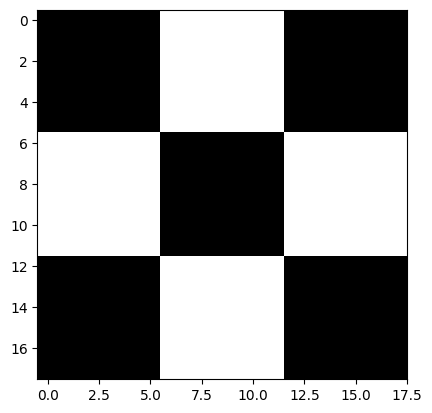

In [6]:
plt.imshow(img, cmap="gray")
print(img)

## Accessing Individual Pixels
* For accessing any pixel in a numpy matrix, you have to use matrix notation such as matrics[r, c], whre the r is the row number and c is the column number. Also note that the matrix is 0-indexed.
* For example, if you want to accessthe first pixel, you need to specify matrix[0,0]. Let us see with some examples. We will print one black pixel from top-left and one white pixel from top-center.  

#### Print the first pixel of the first black box

In [7]:
print(img[0, 0])

0


#### Print the first white pixel to the right of the first black box 

In [8]:
print(img[0, 6])

255


#### We can modify the intensity values of pixels in the same manner as described above.

In [9]:
img_copy = img.copy()
img_copy[2, 2] = 200
img_copy[2, 3] = 200
img_copy[3, 2] = 200
img_copy[3, 3] = 200

In [10]:
# same as above
# img_copy[2:3, 2:3] = 200

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

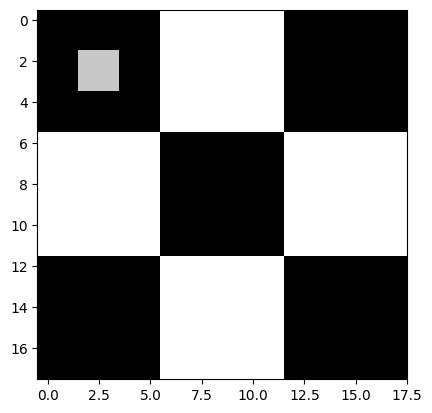

In [14]:
plt.imshow(img_copy, cmap="gray")
print(img_copy)

## Croping images
* Cropping an image is simply achieved by selecting a specific (pixel) region of the image.

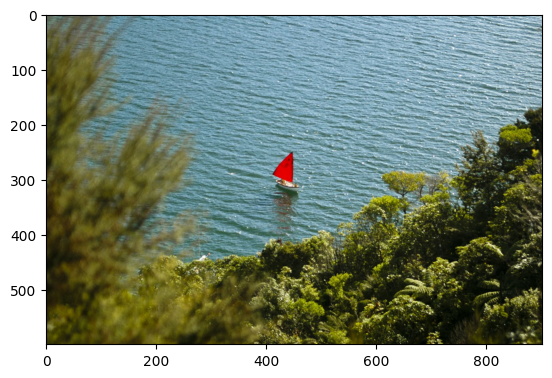

In [15]:
img_boat_bgr = cv2.imread("New_Zealand_Boat.jpg", cv2.IMREAD_COLOR)
img_boat_rgb = img_boat_bgr[:, :, ::-1]

plt.imshow(img_boat_rgb)

#### Crop out the middle region of the image

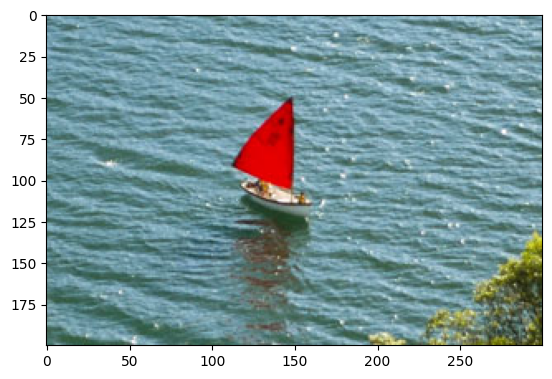

In [16]:
img_cropped = img_boat_rgb[200:400, 300:600]
plt.imshow(img_cropped)

## Resizing Images
* The function **`resize`** resizes the image `src` down to or up to the specified size. The size and type are derived from the `src`,`dsize`,`fx`, and `fy`.
* <font style="color:rgb(8,133,37)">Function Syntax </font>
* img = resize( src, dsize[, dst[, fx[, fy[, interpolation]]]] )
#### The function has **2 required arguments**:
* 1. src: input image
* 2. dsize: output image size
#### Optional arguments that are often used include:
* 1. 'fx': Scale factor along the horizontal axis; when it equals 0, it is computed as (double)dsize.width/src.cols
* 2. 'fy': Scale factor along the vertical axis; when it equals 0, it is computed as (double)dsize.height/src.rows

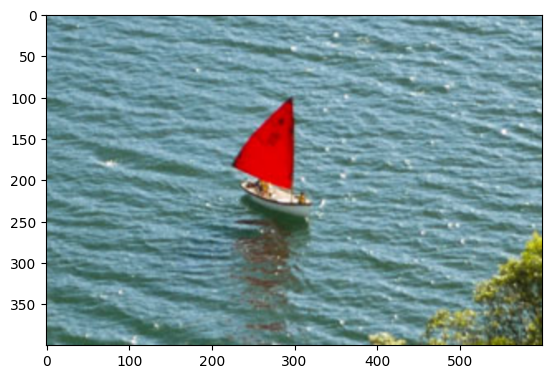

In [17]:
resized_cropped_region_2x = cv2.resize(img_cropped, None, fx=2, fy=2)
plt.imshow(resized_cropped_region_2x)

#### Method 2: Specifying exact size of the output image

In [18]:
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

#### Resize background image to sea size as logo image

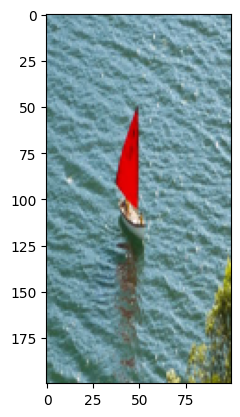

In [19]:
resized_cropped_region = cv2.resize(img_cropped, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

#### Resize while maintaining aspect ratio

In [20]:
desired_width = 100
aspect_ratio = desired_width / img_cropped.shape[1]
desired_height = int(img_cropped.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

#### Resize image

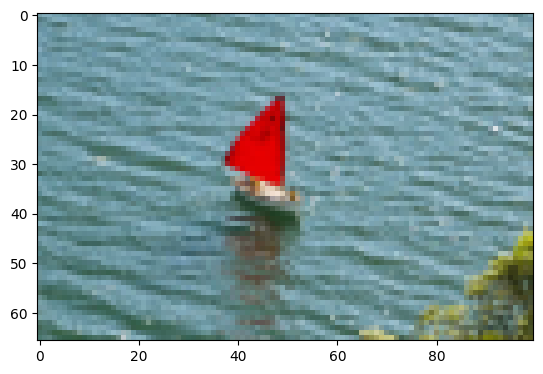

In [21]:
resized_cropped_region = cv2.resize(img_cropped, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

#### Swap channel order

In [22]:
resized_cropped_region_2x = resized_cropped_region_2x[:, :, ::-1]

#### Save resized image to disk

In [ ]:
cv2.imwrite("resized_cropped_region_2x.png", resized_cropped_region_2x)

#### Display the cropped and resized image.

In [ ]:
Image(filename="resized_cropped_region_2x.png")

## Flipping Images
* The function **`flip`** flips the array in one of three different ways (row and column indices are 0-based):
* img = cv.flip( src, flipCode )
* `img`: output array of the same size and type as src.
* The function has **2 required arguments**:
* 1. `src`:	input image
* 2. `flipCode`: a flag to specify how to flip the array; 0 means flipping around the x-axis and positive value (for example, 1) means flipping around y-axis. Negative value (for example, -1) means flipping around both axes.

In [23]:
img_boat_rgb_filpped_horz = cv2.flip(img_boat_rgb, 1)
img_boat_rgb_flipped_vert = cv2.flip(img_boat_rgb, 0)
img_boat_rgb_flipped_both = cv2.flip(img_boat_rgb, -1)

#### Shoe the images

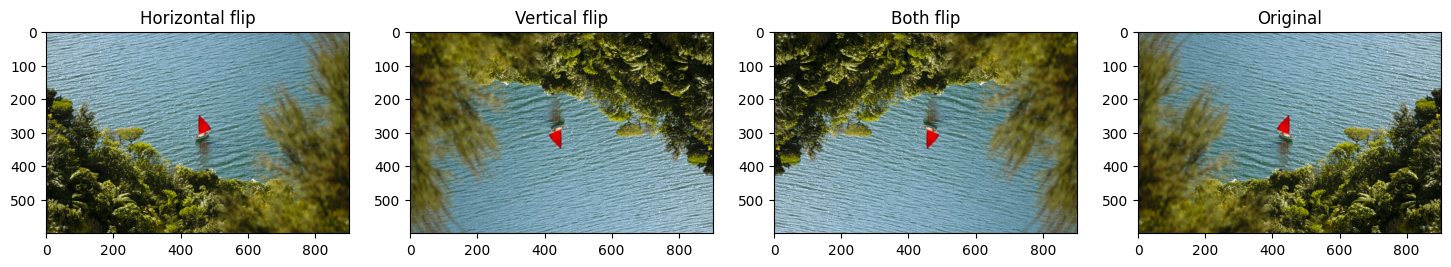

In [26]:
plt.figure(figsize=(18, 5))
plt.subplot(141);plt.imshow(img_boat_rgb_filpped_horz);plt.title("Horizontal flip");
plt.subplot(142);plt.imshow(img_boat_rgb_flipped_vert);plt.title("Vertical flip");
plt.subplot(143);plt.imshow(img_boat_rgb_flipped_both);plt.title("Both flip");
plt.subplot(144);plt.imshow(img_boat_rgb);plt.title("Original");